# Step-1 Importing necessary libraries

In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd  

# Importing numpy for numerical operations
import numpy as np  

# Importing seaborn for statistical data visualization
import seaborn as sns  

# Importing matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt  

# Importing plot_acf for plotting the Autocorrelation Function (ACF)
from statsmodels.graphics.tsaplots import plot_acf  

# Importing adfuller for performing the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller  


### Reading the Stock Dataset

In [2]:
# Reading the dataset from a CSV file using pandas
# Update the path to point to where your CSV file is actually located
df = pd.read_csv("D:\\ALL Resume\\Project For Non-Core Resume\\Python Projects\\Project_1\\Time Series Data Visualization with Python\\stock_data1.csv", parse_dates=True, index_col="Date")

# Displaying the first twenty rows of the dataset to get an overview
df.head(20)


,Open,High,Low,Close,Volume,Name
Date,,,,,,
03-01-2006,39.69,41.22,38.79,40.91,24232729,AABA
04-01-2006,41.22,41.90,40.77,40.97,20553479,AABA
05-01-2006,40.93,41.73,40.85,41.53,12829610,AABA
06-01-2006,42.88,43.57,42.80,43.21,29422828,AABA
09-01-2006,43.10,43.66,42.82,43.42,16268338,AABA
10-01-2006,42.96,43.34,42.34,42.98,16288580,AABA
11-01-2006,42.19,42.31,41.72,41.87,26192772,AABA
12-01-2006,41.92,41.99,40.76,40.89,18921686,AABA
13-01-2006,41.00,41.08,39.62,39.90,30966185,AABA


In [3]:
# Displaying all column names to check if 'Unnamed: 0' is present
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

### Seaborn and Matplotlib to create and display a line plot of the 'High' price over time. It sets the plot style to 'whitegrid', specifies the figure size, and customizes the plot with labels and a title for clarity.

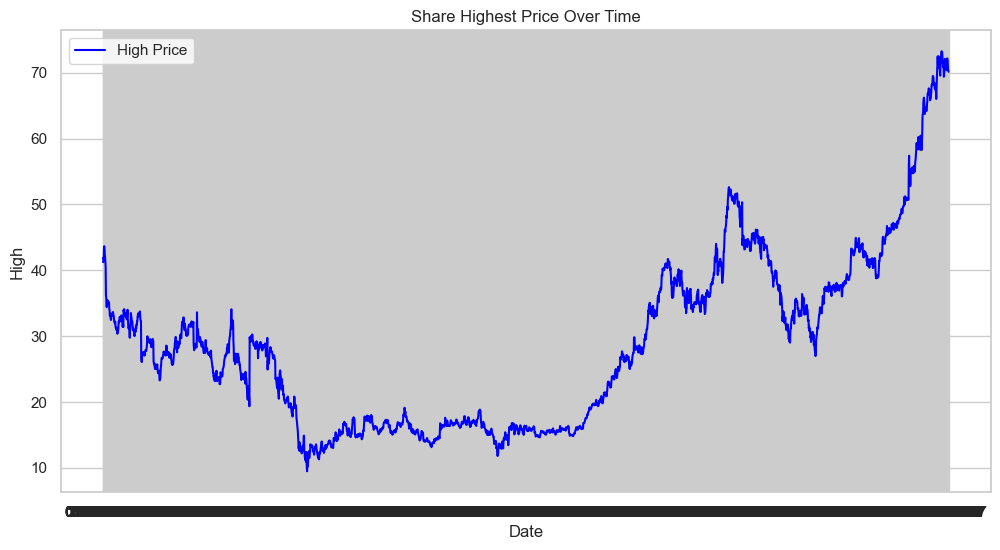

In [4]:
# Importing the seaborn and matplotlib libraries for plotting

# Set the style of the seaborn plots to 'whitegrid' for a clean background
sns.set(style="whitegrid")
7
# Create a new figure with a specific size (width=12, height=6 inches)
plt.figure(figsize=(12, 6))

# Create a line plot using seaborn
# - data=df: Specifies the DataFrame to use for plotting
# - x='Date': The column to use for the x-axis
# - y='High': The column to use for the y-axis
# - label='High Price': The label for the line in the legend
# - color='blue': The color of the line
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('High')

# Add a title to the plot
plt.title('Share Highest Price Over Time')

# Display the plot
plt.show()


In [5]:
print(df.dtypes)  # Check the data types of all columns
print(df.head())  # Inspect the first few rows of the DataFrame


Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object
             Open   High    Low  Close    Volume  Name
Date                                                  
03-01-2006  39.69  41.22  38.79  40.91  24232729  AABA
04-01-2006  41.22  41.90  40.77  40.97  20553479  AABA
05-01-2006  40.93  41.73  40.85  41.53  12829610  AABA
06-01-2006  42.88  43.57  42.80  43.21  29422828  AABA
09-01-2006  43.10  43.66  42.82  43.42  16268338  AABA


### This code converts the 'High' column in the DataFrame to numeric values. Any non-numeric entries are coerced to `NaN` (Not a Number), which handles any conversion errors gracefully.

In [6]:
df['High'] = pd.to_numeric(df['High'], errors='coerce')  # Converts to numeric, setting errors to NaN


In [7]:
print(df.isna().sum())  # Check for missing values in each column
df = df.dropna()  # Drop rows with missing values


Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [8]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])


### **Convert Index to Datetime**: Updates the index to a pandas-compatible date format, while **Resample Data**: groups and averages the data by month.

In [9]:
import pandas as pd

# Convert the index to datetime
df_numeric.index = pd.to_datetime(df_numeric.index, format='%d-%m-%Y')

# Now perform the resampling
df_resampled = df_numeric.resample('ME').mean()


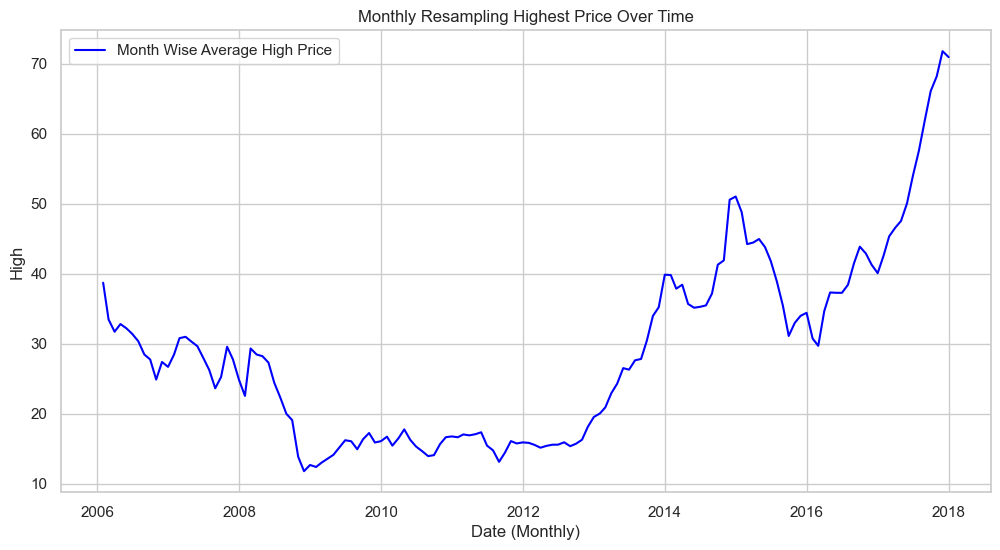

In [10]:
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background
 
# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')
 
# Adding labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
 
plt.show()

<Figure size 1200x600 with 0 Axes>

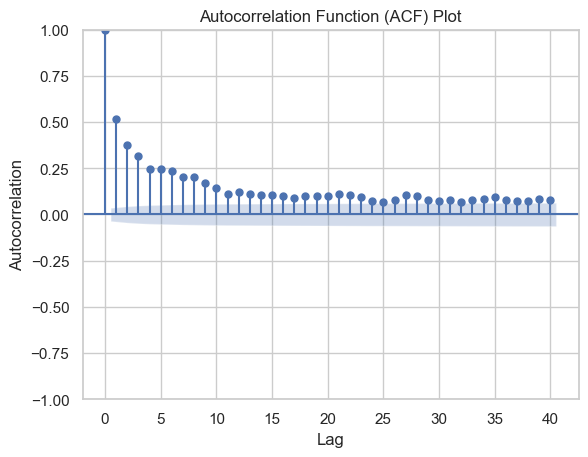

In [11]:
# Ensure 'Volume' column exists
if 'Volume' in df.columns:
    plt.figure(figsize=(12, 6))
    plot_acf(df['Volume'], lags=40)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF) Plot')
    plt.show()
else:
    print("The 'Volume' column is not present in the DataFrame.")


In [12]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['High'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.7671404880535937
p-value: 0.9910868050318213
Critical Values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


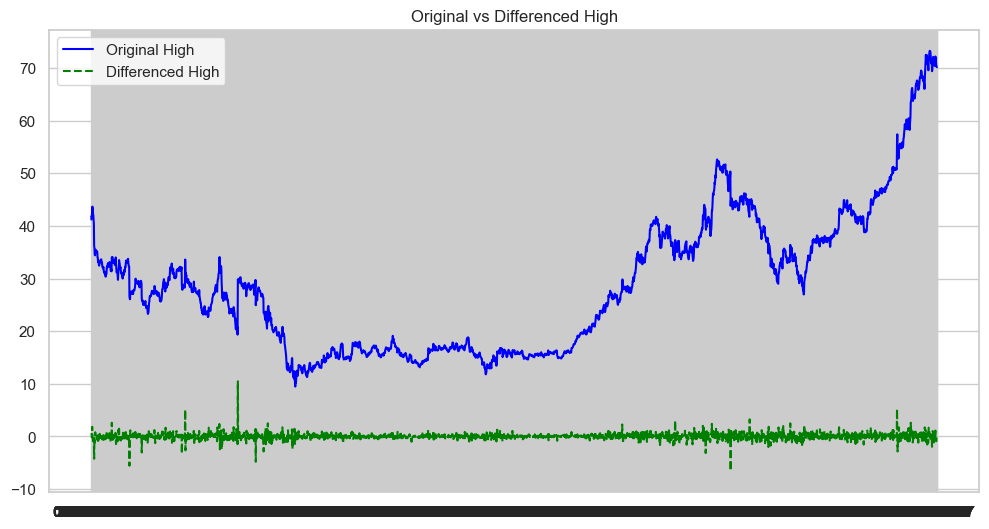

In [13]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()


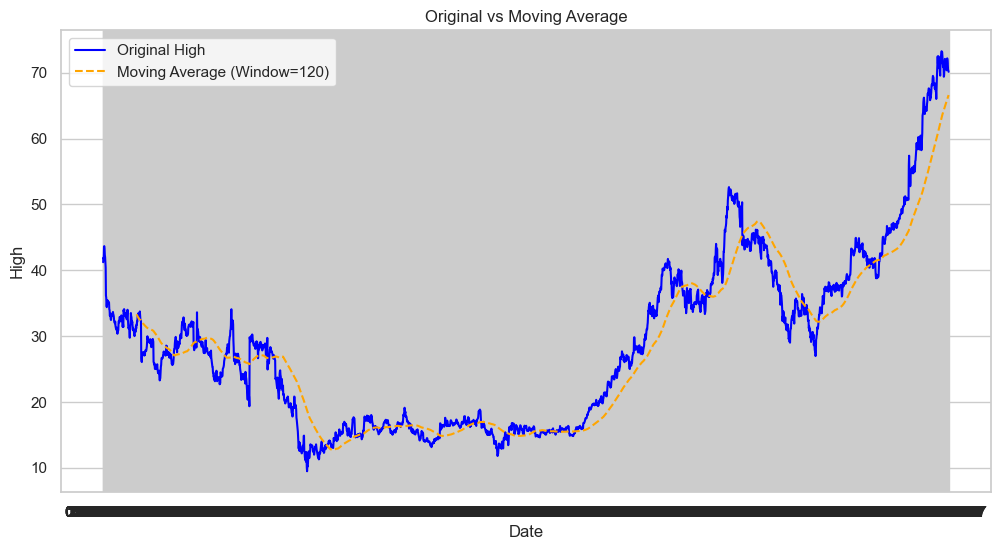

In [14]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['High'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()


In [15]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


             High  high_diff
Date                        
03-01-2006  41.22        NaN
04-01-2006  41.90       0.68
05-01-2006  41.73      -0.17
06-01-2006  43.57       1.84
09-01-2006  43.66       0.09


#### 03-01-2006: Initial high value of 41.22, no previous value for comparison.
#### 04-01-2006: High value increased to 41.90, showing a rise of 0.68 from the previous day.
#### 05-01-2006: High value decreased slightly to 41.73, a drop of 0.17 from the previous day.
#### 06-01-2006: High value rose to 43.57, up by 1.84 from the previous day.
#### 09-01-2006: High value slightly increased to 43.66, showing a gain of 0.09 from the previous day.

In [16]:
# Remove rows with missing values
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()


Date
04-01-2006    0.68
05-01-2006   -0.17
06-01-2006    1.84
09-01-2006    0.09
10-01-2006   -0.32
Name: high_diff, dtype: float64

In [17]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -12.148367478343273
p-value: 1.591276613414641e-22
Critical Values: {'1%': np.float64(-3.4325316347197403), '5%': np.float64(-2.862503905260741), '10%': np.float64(-2.5672831121111113)}


#### The results of the Augmented Dickey-Fuller (ADF) test for stationarity are as follows:

#### ADF Statistic: -12.15
#### p-value: 1.59e-22
#### Critical Values:
#### 1%: -3.43
#### 5%: -2.86
#### 10%: -2.57


### Thank You